# **Sunday Afternoon Fever**
#### A metric and analysis of **DIS**guised **CO**verages on Defense

Authors: [Drew Malter](https://www.linkedin.com/in/drew-malter-43a5a4b7/), [Danny Malter](https://www.linkedin.com/in/danmalter/)

Metric Track

# Introduction

Game theory and deception are components to almost every single play in football.  In addition to great talent, football fans love to watch how head coaches, coordinators, and players are constantly trying to outsmart their opponents.  One of many opportunities for teams to leverage deception is with defensive pre-snap alignments, when a defense’s goal is to confuse the offense as to what pass coverage they will run.  Perhaps they are disguising a coverage, or they want the offense to *believe* a disguised coverage is coming when it is not.  Thanks to the NFL and Next Gen Stats, we propose a metric that evaluates the frequency each team’s defense disguises their coverage in the moments before the ball is snapped: *DISCO*

#### ***DISCO***: ***DIS***guised ***CO***verage %:
- The percent of plays a team’s defense transforms to an unlikely pass coverage given their pre-snap alignment and movements

$$
\text{DISCO} = \frac{\text{Plays where defense transformed into an unlikely post-snap coverage}}{\text{Total plays}}
$$

- Unlikely is defined as a coverage that is observed (across NFL) less than 10% of plays given the pre-snap alignment

- Note: This metric can also be broken down by pre-snap alignment type

# Approach for Developing DISCO

Our approach involves leveraging an unsupervised machine learning model, [K-Medoids](https://medium.com/@prasanNH/exploring-the-world-of-clustering-k-means-vs-k-medoids-f648ea738508), to separate pre-snap alignments and movements into clusters, and then to analyze the resulting clusters to learn about what they entail post-snap.   Considering the behaviors of defensive backs pre-snap provide the best indications into what coverage the defense may run, we found that linemen and linebacker data added noise to our model that did not enhance our output and analysis.

We capture the location and orientation metrics at *two seconds before the snap*, and motion metrics throughout the pre-snap period.  We found that defenses are more likely to reveal their alignment as time passes from the huddle break, yet we need to use a time early enough that the metric can be relevant to a QB/offense who has a moment to process what is observed.

##### We considered the following metrics for the model (as if play direction is horizontal, left to right):

-	Deepest safety/DB horizontal distance from ball
-	Deepest safety/DB vertical distance/direction from ball
-	2nd deepest safety/DB horizontal distance from ball
-	2nd deepest safety/DB vertical distance/direction from ball
-   Two deepest backs vertical distance/direction from center of field
-   All DB direction of pre-snap motion
-   Two deepest safeties/DB's angle of body orientation
-	For each CB
    - Horizontal distance from ball
    - Vertical distance/direction from ball
    - Horizontal distance from nearest receiver
    - Vertical distance/direction from nearest receiver
    - Angle of body orientation
-	For offensive plays using a pre-snap motion
    - Defender motion relative to receiver motion

##### Potentially relevant metrics not included:
- Verbal signals
- Hand gestures/pointing
- Direction player is leaning
- Direction a player is looking (independent  of body orientation)
- Game situation (e.g. - down, yards, score, previous play(s)
- Team historical alignments



The objective of the K-Medoids model is to identify data points among a cluster of similar data (data within proximity) while differentiating data points that are far apart.  For example, just as a QB can often spot the difference between a Cover 1 and Cover 3 based on the distance defensive backs are from receivers, response to motion and perhaps their body orientation, even if both have a similar location of a middle deep safety, the cluster algorithm can recognize those alignments as distinct.  The purpose of identifying unique clusters in an unsupervised model is not to predict the defenses coverage, but to further explore post-snap coverages as a function of pre-snap alignments.  

# Cluster Results

Theoretically, pre-snap alignments can be grouped into any number of clusters.  Our model found that 4 was the fewest distinct groupings to signal meaningful and insightful differences, yet few enough to be practical and to not overfit clusters.  As we see in the below chart, defenses can and have operated in any coverage from any pre-snap alignment cluster, however, we do find unique patterns across clusters.

Note: We are just showing the most common pass coverages, and all types of coverage within the same category are grouped together.  E.g. – Cover 3 Cloud Left, Cover 3 Cloud Right

In [3]:
#import packages
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [32]:
#read in data and parse dates, adjust other data types
#df_plays = pd.read_csv('plays.csv', parse_dates = ['GameDate'])
df_plays = pd.read_csv('~/Documents/Kaggle/NFL Big Data Bowl 2025/data/plays.csv')
df_games = pd.read_csv('~/Documents/Kaggle/NFL Big Data Bowl 2025/data/games.csv')
df_players = pd.read_csv('~/Documents/Kaggle/NFL Big Data Bowl 2025/data/players.csv')
df_player_play = pd.read_csv('~/Documents/Kaggle/NFL Big Data Bowl 2025/data/player_play.csv')
df_week1 = pd.read_csv('~/Documents/Kaggle/NFL Big Data Bowl 2025/data/tracking_week_1.csv', parse_dates = ['time'])
df_week2 = pd.read_csv('~/Documents/Kaggle/NFL Big Data Bowl 2025/data/tracking_week_2.csv', parse_dates = ['time'])
df_week3 = pd.read_csv('~/Documents/Kaggle/NFL Big Data Bowl 2025/data/tracking_week_3.csv', parse_dates = ['time'])
df_week4 = pd.read_csv('~/Documents/Kaggle/NFL Big Data Bowl 2025/data/tracking_week_4.csv', parse_dates = ['time'])
df_week5 = pd.read_csv('~/Documents/Kaggle/NFL Big Data Bowl 2025/data/tracking_week_5.csv', parse_dates = ['time'])
df_week6 = pd.read_csv('~/Documents/Kaggle/NFL Big Data Bowl 2025/data/tracking_week_6.csv', parse_dates = ['time'])
df_week7 = pd.read_csv('~/Documents/Kaggle/NFL Big Data Bowl 2025/data/tracking_week_7.csv', parse_dates = ['time'])
df_week8 = pd.read_csv('~/Documents/Kaggle/NFL Big Data Bowl 2025/data/tracking_week_8.csv', parse_dates = ['time'])
df_week9 = pd.read_csv('~/Documents/Kaggle/NFL Big Data Bowl 2025/data/tracking_week_9.csv', parse_dates = ['time'])
#df_week1.head()

#Data Prep

#Concat all weekly df's into one
df_weeks = pd.concat([df_week1, df_week2, df_week3, df_week4, df_week5, df_week6, df_week7, df_week8, df_week9])
#df_weeks.shape




df_coverages_clusters = pd.read_csv('../assets/data/NFL Data Bowl 2025/df_coverages_clusters.csv')
df_coverages_clusters.rename(columns=lambda x: x.replace('Unnamed: 0', ''), inplace=True)

# Use Pandas styling to display the DataFrame with formatting and hide the index
df_coverages_clusters_styled = df_coverages_clusters.style.format({
    'Coverage': lambda x: x,  # Leave 'Coverage' column as is
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('background-color', '#013369'),
                                 ('font-weight', 'bold'), ('color', 'white')]},  # Make column label text white
    {'selector': 'td', 'props': [('text-align', 'center'), ('font-size', '14px')]},  # Adjust font size here
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},  # Lighter grey for even rows
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'white')]},   # Default grey for odd rows
], overwrite=False).set_properties(**{'border': 'none', 'padding': '5px'})  # Remove the borders

# Hide the index
df_coverages_clusters_styled = df_coverages_clusters_styled.hide(axis='index')

# Add a title as a caption
df_coverages_clusters_styled = df_coverages_clusters_styled.set_caption(
    '% of Post Snap Coverage Given Pre Snap Cluster'
).set_table_styles([
    {'selector': 'caption', 'props': [('caption-side', 'top'), ('text-align', 'center'),
                                      ('font-size', '14px'), ('font-weight', 'bold'), ('color', 'black')]}
], overwrite=False)

# Display the styled DataFrame
from IPython.display import display
display(df_coverages_clusters_styled)

,Cover 0,Cover 1,Cover 2,Cover 3,Quarters,Cover 6
Pre Snap Cluster-1,4%,14%,9%,50%,15%,7%
Pre Snap Cluster-2,7%,53%,8%,30%,2%,1%
Pre Snap Cluster-3,2%,19%,19%,28%,17%,15%
Pre Snap Cluster-4,1%,20%,23%,26%,15%,16%


Now that we have a sense of the frequency defenses operate different pass coverages from each cluster, we can explore how several of our model input metrics average out by Cluster.

Note:
- Metrics are adjusted as if all play directions are left to right
- 0 degrees is facing directly at the line of scrimmage to the left.


There are several takeaways but a few to note are:

- Clusters 1 and 2 tend to have the deepest DB aligned close to the center of the field
- Clusters 3 and 4 on average see the two deepest DB's aligned 5-6 yards off the center on each side   
- Cluster 2’s greatest distinction is having the combination of DB’s closest to the WR’s while the deepest DB is aligned in the center
- Clusters 3 and 4 have average separation between DB’s and WR’s greater than 5 yards
- A key distinction between Clusters 3 and 4 is the opposite Y-direction from the ball between the two deepest backs
- The average orientation of DB’s is lowest for Cluster 1


In [42]:

# mean_summary_transposed['Metric (Yards)'] = mean_summary_transposed['Metric (Yards)'].map(metric_names)
mean_summary_transposed = pd.read_csv('../assets/data/NFL Data Bowl 2025/mean_summary_transposed.csv')

# Rename cluster columns
cluster_column_map = {1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4'}
mean_summary_transposed.rename(columns=cluster_column_map, inplace=True)

# Apply formatting and hide the index
styled_df = mean_summary_transposed.style.format(precision=2).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('background-color', '#013369'),
                                 ('font-weight', 'bold'), ('color', 'white')]},  # Header styles
    {'selector': 'td', 'props': [('text-align', 'center'), ('font-size', '14px')]},  # Cell styles
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},  # Lighter grey for even rows
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'white')]},   # Default white for odd rows
]).set_properties(**{'border': 'none', 'padding': '5px'})  # Cell padding and border adjustments

# Hide the index
styled_df = styled_df.hide(axis="index")

# Add a title as a caption
styled_df = styled_df.set_caption(
    'Average Value for Each Pre Snap Cluster'
).set_table_styles([
    {'selector': 'caption', 'props': [('caption-side', 'top'), ('text-align', 'center'),
                                      ('font-size', '14px'), ('font-weight', 'bold'), ('color', 'black')]}
], overwrite=False)

# Display the styled DataFrame
from IPython.display import display
display(styled_df)

Metric,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Farthest DB X Yards From Football,12.52,12.97,13.53,13.82
Farthest DB Y Yards From Football,0.59,0.29,-6.78,5.98
2nd Farthest DB X Yards From Football,8.42,5.75,11.05,11.02
2nd Fathest DB Y Yards From Ball,1.08,-4.86,5.93,-6.20
Nearest DB X Yards From WR1,5.83,2.35,3.26,2.84
Nearest DB Y Yards From WR1,6.10,4.73,6.08,5.54
Nearest DB X Yards From WR2,3.49,3.34,5.52,5.00
Nearest DB Y Yards From WR2,2.35,3.54,4.94,5.31
Nearest DB to WR1 Orientation Degrees From LOS,8.63,29.29,20.41,26.57
2nd Nearest DB to WR2 Orientation Degrees From LOS,0.83,15.14,9.20,8.65


# Visualizing the Clusters in Action

With a basic understanding of the differentiators of each cluster, we can now look at a sample play from each, plus one additional example of a disguised coverage from a (lack of) motion.

# Cluster 1: Jazz

Like jazz music, this pre-snap alignment allows for a smooth transition into its most common coverage, Cover 3.   There is one deep safety, but other DBs are not pressing receivers.  In this play, Kyler Murray looks to hit Marquise Brown over the middle just across the first down marker. After Brown bounces off the would-be tackler, he gives the Cardinals more than they bargained for with a touchdown.

Press the play button to watch (time speed is 2x), or watch the play manually by adjusting the time toggle.  

In [49]:
df_weeks_game1 = df_weeks.loc[df_weeks['gameId'] == 2022100911].reset_index()
df_weeks_game1 = df_weeks_game1.loc[df_weeks_game1['playId'] == 1566]

df_weeks_game2 = df_weeks.loc[df_weeks['gameId'] == 2022091804].reset_index()
df_weeks_game2 = df_weeks_game2.loc[df_weeks_game2['playId'] == 3409]

df_weeks_game3 = df_weeks.loc[df_weeks['gameId'] == 2022100904].reset_index()
df_weeks_game3 = df_weeks_game3.loc[df_weeks_game3['playId'] == 3001]

df_weeks_game4 = df_weeks.loc[df_weeks['gameId'] == 2022092900].reset_index()
df_weeks_game4 = df_weeks_game4.loc[df_weeks_game4['playId'] == 2598]

df_weeks_game5 = df_weeks.loc[df_weeks['gameId'] == 2022102307].reset_index()
df_weeks_game5 = df_weeks_game5.loc[df_weeks_game5['playId'] == 2733]

#df_weeks_game2.tail()


#Example of Cluster 1
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display
import plotly.io as pio
pio.renderers.default = 'iframe'
#pio.renderers.default = 'notebook'

# Assuming df_weeks_game3 is your DataFrame
df_weeks_game1 = df_weeks_game1.loc[df_weeks_game1['time'].notnull()]
df_weeks_game1['time_str'] = df_weeks_game1['time'].astype(str)  # Convert time to string for Plotly

# Create scatter plot with animation
fig = px.scatter(
    df_weeks_game1,
    x='x',
    y='y',
    animation_frame='time_str',
    color='club',
    size=[1] * len(df_weeks_game1),  # Set dot sizes
    size_max=12,
    text='jerseyNumber',  # Add jersey numbers as text labels
    range_x=[0, 120],
    range_y=[0, 53.3],
    title='Eagles at Cardinals: Cluster 1 to Cover 3',
    color_discrete_map={'football': '#814d0f', 'PHI': '#58aab2', 'ARI': '#f43535'}  # Set colors for dots
)
# Center the title and customize the font
fig.update_layout(
    title={
        'x': 0.5,  # Center title horizontally
        'xanchor': 'center',  # Ensure it aligns correctly
        'yanchor': 'top',  # Top alignment for title
        'font': {
            'family': 'Arial, sans-serif',  # Change font family
            'size': 16,  # Set font size
            'color': 'black'  # Set font color
        }
    }
)
# Customize layout to resemble a football field
fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    plot_bgcolor="#3f9b0b",  # Set field color
    xaxis=dict(
        showticklabels=False,  # Remove x-axis labels
        gridcolor="white",  # Vertical grid lines for yard markers
        tickvals=list(range(0, 121, 10)),  # Tick marks every 10 yards
        ticktext=[f"{i}" for i in range(0, 121, 10)],
    ),
    yaxis=dict(
        showgrid=False,  # Disable horizontal grid lines
        showticklabels=False  # No ticks on the y-axis
    ),
    height=500,  # Adjust height
    width=675,  # Adjust width
    legend_title_text="Team",  # Set legend title
)

# Add darker green end zones
fig.add_shape(
    type="rect",
    x0=0,
    x1=10,
    y0=0,
    y1=53.3,
    fillcolor="#f43535",  # endzone
    opacity=1,
    layer="below",
    line_width=0,
)
fig.add_shape(
    type="rect",
    x0=110,
    x1=120,
    y0=0,
    y1=53.3,
    fillcolor="#f43535",  # endzone
    opacity=1,
    layer="below",
    line_width=0,
)

# Add vertical yard markers
for x in range(10, 111, 10):
    fig.add_shape(
        type="line",
        x0=x,
        x1=x,
        y0=0,
        y1=53.3,
        line=dict(color="white", width=2),
        layer="below"
    )

# Add a yellow line at x = 52
fig.add_shape(
    type="line",
    x0=32,
    x1=32,
    y0=0,
    y1=53.3,
    line=dict(color="yellow", width=3),  # Yellow color
    layer="below"
)


# Add dotted white horizontal lines
fig.add_shape(
    type="line",
    x0=0,
    x1=120,
    y0=22.8,
    y1=22.8,
    line=dict(color="white", width=2, dash="dot"),  # Dotted white line
    layer="below"
)

# Add dotted white horizontal lines
fig.add_shape(
    type="line",
    x0=0,
    x1=120,
    y0=30.5,
    y1=30.5,
    line=dict(color="white", width=2, dash="dot"),  # Dotted white line
    layer="below"
)
# Add yard marker annotations
yard_markers = {
    20: "10", 30: "20", 40: "30", 50: "40",
    60: "50", 70: "40", 80: "30", 90: "20", 100: "10"
}
for x, text in yard_markers.items():
    fig.add_annotation(
        x=x,
        y=11,  # Fixed y coordinate for text placement
        text=text,
        showarrow=False,
        font=dict(color="white", size=15),  # White font
        align="center"
    )


for x, text in yard_markers.items():
    fig.add_annotation(
        x=x,
        y=42.2,  # Fixed y coordinate for text placement
        text=text,
        showarrow=False,
        font=dict(color="white", size=15),  # White font
        align="center",
        textangle=180
    )
# Add the NFL logo image to the center of the field
fig.update_layout(
    images=[
        dict(
            source="https://upload.wikimedia.org/wikipedia/en/a/a2/National_Football_League_logo.svg",
            x=0.5,  # Center of the field (normalized coordinate: 0 to 1)
            y=0.5,  # Center of the field (normalized coordinate: 0 to 1)
            xref="paper",  # Reference x-axis in normalized coordinates
            yref="paper",  # Reference y-axis in normalized coordinates
            sizex=0.2,  # Width of the image (relative to the plot)
            sizey=0.2,  # Height of the image (relative to the plot)
            xanchor="center",  # Align image to its center on x
            yanchor="middle",  # Align image to its center on y
            layer="above"  # Place the image below the data
        )
    ]
)

# Customize Play/Pause buttons
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 50, 'redraw': True}, 'fromcurrent': True}],
                'label': '▶',  # Play icon
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': '⏸',  # Pause icon
                'method': 'animate'
            }
        ],
        'direction': 'left',
        #'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Rename the animation label above the slider
fig.update_layout(
    sliders=[{
        'currentvalue': {
            'prefix': 'Time: ',  # Change "time_str:" to "time:"
            'font': {'size': 14, 'color': 'black'}
        }
    }]
)
# Ensure dots are on top by adjusting the z-order of the scatter plot trace
fig.update_traces(marker=dict(size=10, opacity=0.8, line=dict(width=2, color="DarkSlateGrey")), selector=dict(mode="markers"), z=101)
# Show the plot
fig.show()

# Cluster 2: Rock n’ Roll
Just as a rock song can stand out with a great guitar solo, the solo DB stands out in the Cluster 2 alignment.  Here, in addition to one deep safety, a pre-snap motion is shadowed by the Saints DB. Tom Brady likes the outside 1-on-1 matchup with his wide receiver, Breshad Perriman, who catches the 4th quarter go-ahead touchdown.

In [52]:
#Example of Cluster 2

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Assuming df_weeks_game3 is your DataFrame
df_weeks_game2 = df_weeks_game2.loc[df_weeks_game2['time'].notnull()]
df_weeks_game2['time_str'] = df_weeks_game2['time'].astype(str)  # Convert time to string for Plotly

# Create scatter plot with animation
fig = px.scatter(
    df_weeks_game2,
    x='x',
    y='y',
    animation_frame='time_str',
    color='club',
    size=[1] * len(df_weeks_game2),  # Set dot sizes
    size_max=12,
    text='jerseyNumber',  # Add jersey numbers as text labels
    range_x=[0, 120],
    range_y=[0, 53.3],
    title='Bucs at Saints: Cluster 2 to Cover 1',
    color_discrete_map={'football': '#814d0f', 'TB': '#df4848', 'NO': '#D3BC8D'}  # Set colors for dots
)
# Center the title and customize the font
fig.update_layout(
    title={
        'x': 0.5,  # Center title horizontally
        'xanchor': 'center',  # Ensure it aligns correctly
        'yanchor': 'top',  # Top alignment for title
        'font': {
            'family': 'Arial, sans-serif',  # Change font family
            'size': 16,  # Set font size
            'color': 'black'  # Set font color
        }
    }
)
# Customize layout to resemble a football field
fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    plot_bgcolor="#3f9b0b",  # Set field color
    xaxis=dict(
        showticklabels=False,  # Remove x-axis labels
        gridcolor="white",  # Vertical grid lines for yard markers
        tickvals=list(range(0, 121, 10)),  # Tick marks every 10 yards
        ticktext=[f"{i}" for i in range(0, 121, 10)],
    ),
    yaxis=dict(
        showgrid=False,  # Disable horizontal grid lines
        showticklabels=False  # No ticks on the y-axis
    ),
    height=500,  # Adjust height
    width=575,  # Adjust width
    legend_title_text="Team",  # Set legend title
)

# Add darker green end zones
fig.add_shape(
    type="rect",
    x0=0,
    x1=10,
    y0=0,
    y1=53.3,
    fillcolor="#D3BC8D",  # endzone
    opacity=1,
    layer="below",
    line_width=0,
)
fig.add_shape(
    type="rect",
    x0=110,
    x1=120,
    y0=0,
    y1=53.3,
    fillcolor="#D3BC8D",  # endzone
    opacity=1,
    layer="below",
    line_width=0,
)

# Add vertical yard markers
for x in range(10, 111, 10):
    fig.add_shape(
        type="line",
        x0=x,
        x1=x,
        y0=0,
        y1=53.3,
        line=dict(color="white", width=2),
        layer="below"
    )

# Add a yellow line at x = 52
fig.add_shape(
    type="line",
    x0=33,
    x1=33,
    y0=0,
    y1=53.3,
    line=dict(color="yellow", width=3),  # Yellow color
    layer="below"
)


# Add dotted white horizontal lines
fig.add_shape(
    type="line",
    x0=0,
    x1=120,
    y0=22.8,
    y1=22.8,
    line=dict(color="white", width=2, dash="dot"),  # Dotted white line
    layer="below"
)

# Add dotted white horizontal lines
fig.add_shape(
    type="line",
    x0=0,
    x1=120,
    y0=30.5,
    y1=30.5,
    line=dict(color="white", width=2, dash="dot"),  # Dotted white line
    layer="below"
)
# Add yard marker annotations
yard_markers = {
    20: "10", 30: "20", 40: "30", 50: "40",
    60: "50", 70: "40", 80: "30", 90: "20", 100: "10"
}
for x, text in yard_markers.items():
    fig.add_annotation(
        x=x,
        y=11,  # Fixed y coordinate for text placement
        text=text,
        showarrow=False,
        font=dict(color="white", size=15),  # White font
        align="center"
    )


for x, text in yard_markers.items():
    fig.add_annotation(
        x=x,
        y=42.2,  # Fixed y coordinate for text placement
        text=text,
        showarrow=False,
        font=dict(color="white", size=15),  # White font
        align="center",
        textangle=180
    )
# Add the NFL logo image to the center of the field
fig.update_layout(
    images=[
        dict(
            source="https://upload.wikimedia.org/wikipedia/en/a/a2/National_Football_League_logo.svg",
            x=0.5,  # Center of the field (normalized coordinate: 0 to 1)
            y=0.5,  # Center of the field (normalized coordinate: 0 to 1)
            xref="paper",  # Reference x-axis in normalized coordinates
            yref="paper",  # Reference y-axis in normalized coordinates
            sizex=0.2,  # Width of the image (relative to the plot)
            sizey=0.2,  # Height of the image (relative to the plot)
            xanchor="center",  # Align image to its center on x
            yanchor="middle",  # Align image to its center on y
            layer="above"  # Place the image below the data
        )
    ]
)

# Customize Play/Pause buttons
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 50, 'redraw': True}, 'fromcurrent': True}],
                'label': '▶',  # Play icon
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': '⏸',  # Pause icon
                'method': 'animate'
            }
        ],
        'direction': 'left',
        #'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Rename the animation label above the slider
fig.update_layout(
    sliders=[{
        'currentvalue': {
            'prefix': 'Time: ',  # Change "time_str:" to "time:"
            'font': {'size': 14, 'color': 'black'}
        }
    }]
)
# Ensure dots are on top by adjusting the z-order of the scatter plot trace
fig.update_traces(marker=dict(size=10, opacity=0.8, line=dict(width=2, color="DarkSlateGrey")), selector=dict(mode="markers"), z=101)
# Show the plot
fig.show()

# Cluster 3: Classical
This alignment is structured in a methodical way, much like classical music.  Compared to Clusters 1 and 2, several coverages are within the norm from this alignment.  In this play, the Bears drop into a Cover 2, but there are elements to the alignment that closely resemble other coverages. We can observe two DBs pressed closely to wide receivers and the highest DB near the center of the field until drifting wide in the final two seconds before the snap (our timestamp for measuring an alignment cluster).  Ultimately, DB #22 Kindle Vindor drops to coverage and comes up with the interception.  


In [55]:
#Example of Cluster 3

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Assuming df_weeks_game3 is your DataFrame
df_weeks_game3 = df_weeks_game3.loc[df_weeks_game3['time'].notnull()]
df_weeks_game3['time_str'] = df_weeks_game3['time'].astype(str)  # Convert time to string for Plotly

# Create scatter plot with animation
fig = px.scatter(
    df_weeks_game3,
    x='x',
    y='y',
    animation_frame='time_str',
    color='club',
    size=[1] * len(df_weeks_game3),  # Set dot sizes
    size_max=12,
    text='jerseyNumber',  # Add jersey numbers as text labels
    range_x=[0, 120],
    range_y=[0, 53.3],
    title='Bears at Vikings: Cluster 3 to Cover 2',
    color_discrete_map={'football': '#814d0f', 'CHI': '#C83803', 'MIN': '#c326fa'}  # Set colors for dots
)

# Center the title and customize the font
fig.update_layout(
    title={
        'x': 0.5,  # Center title horizontally
        'xanchor': 'center',  # Ensure it aligns correctly
        'yanchor': 'top',  # Top alignment for title
        'font': {
            'family': 'Arial, sans-serif',  # Change font family
            'size': 16,  # Set font size
            'color': 'black'  # Set font color
        }
    }
)

# Customize layout to resemble a football field
fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    plot_bgcolor="#3f9b0b",  # Set field color
    xaxis=dict(
        showticklabels=False,  # Remove x-axis labels
        gridcolor="white",  # Vertical grid lines for yard markers
        tickvals=list(range(0, 121, 10)),  # Tick marks every 10 yards
        ticktext=[f"{i}" for i in range(0, 121, 10)],
    ),
    yaxis=dict(
        showgrid=False,  # Disable horizontal grid lines
        showticklabels=False  # No ticks on the y-axis
    ),
    height=500,  # Adjust height
    width=575,  # Adjust width
    legend_title_text="Team",  # Set legend title
)

# Add darker green end zones
fig.add_shape(
    type="rect",
    x0=0,
    x1=10,
    y0=0,
    y1=53.3,
    fillcolor="#9f19ce",  # endzone
    opacity=1,
    layer="below",
    line_width=0,
)
fig.add_shape(
    type="rect",
    x0=110,
    x1=120,
    y0=0,
    y1=53.3,
    fillcolor="#9f19ce",  # endzone
    opacity=1,
    layer="below",
    line_width=0,
)

# Add vertical yard markers
for x in range(10, 111, 10):
    fig.add_shape(
        type="line",
        x0=x,
        x1=x,
        y0=0,
        y1=53.3,
        line=dict(color="white", width=2),
        layer="below"
    )

# Add a yellow line at x = 52
fig.add_shape(
    type="line",
    x0=78,
    x1=78,
    y0=0,
    y1=53.3,
    line=dict(color="yellow", width=3),  # Yellow color
    layer="below"
)


# Add dotted white horizontal lines
fig.add_shape(
    type="line",
    x0=0,
    x1=120,
    y0=22.8,
    y1=22.8,
    line=dict(color="white", width=2, dash="dot"),  # Dotted white line
    layer="below"
)

# Add dotted white horizontal lines
fig.add_shape(
    type="line",
    x0=0,
    x1=120,
    y0=30.5,
    y1=30.5,
    line=dict(color="white", width=2, dash="dot"),  # Dotted white line
    layer="below"
)
# Add yard marker annotations
yard_markers = {
    20: "10", 30: "20", 40: "30", 50: "40",
    60: "50", 70: "40", 80: "30", 90: "20", 100: "10"
}
for x, text in yard_markers.items():
    fig.add_annotation(
        x=x,
        y=11,  # Fixed y coordinate for text placement
        text=text,
        showarrow=False,
        font=dict(color="white", size=15),  # White font
        align="center"
    )


for x, text in yard_markers.items():
    fig.add_annotation(
        x=x,
        y=42.2,  # Fixed y coordinate for text placement
        text=text,
        showarrow=False,
        font=dict(color="white", size=15),  # White font
        align="center",
        textangle=180
    )
# Add the NFL logo image to the center of the field
fig.update_layout(
    images=[
        dict(
            source="https://upload.wikimedia.org/wikipedia/en/a/a2/National_Football_League_logo.svg",  # Replace with the URL of the NFL logo
            x=0.5,  # Center of the field (normalized coordinate: 0 to 1)
            y=0.5,  # Center of the field (normalized coordinate: 0 to 1)
            xref="paper",  # Reference x-axis in normalized coordinates
            yref="paper",  # Reference y-axis in normalized coordinates
            sizex=0.2,  # Width of the image (relative to the plot)
            sizey=0.2,  # Height of the image (relative to the plot)
            xanchor="center",  # Align image to its center on x
            yanchor="middle",  # Align image to its center on y
            layer="below"  # Place the image below the data
        )
    ]
)

# Customize Play/Pause buttons
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 50, 'redraw': True}, 'fromcurrent': True}],
                'label': '▶',  # Play icon
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': '⏸',  # Pause icon
                'method': 'animate'
            }
        ],
        'direction': 'left',
        #'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Rename the animation label above the slider
fig.update_layout(
    sliders=[{
        'currentvalue': {
            'prefix': 'Time: ',  # Change "time_str:" to "time:"
            'font': {'size': 14, 'color': 'black'}
        }
    }]
)

# Ensure dots are on top by adjusting the z-order of the scatter plot trace
fig.update_traces(marker=dict(size=10, opacity=0.8, line=dict(width=2, color="DarkSlateGrey")), selector=dict(mode="markers"), z=101)
# Show the plot
fig.show()

# Cluster 4:  Electronic
While electronic music is versatile with a variety of tones, beats, and rhythms, this alignment follows suit by being the most versatile to coverage variety.  Cover 2, Quarters, and Cover 6 are not represented as the most common coverage for any cluster, but this cluster would be closest for all three.  In the below case, the Bengals show two deep backs on each side of the field, are not pressing any receivers until the final second, and drop into Quarters. Tua Tagovailoa hits Tyreek Hill on the center deep ball, nicely finding the gap in coverage.

In [58]:
#Example of Cluster 4

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Assuming df_weeks_game5 is your DataFrame
df_weeks_game4 = df_weeks_game4.loc[df_weeks_game4['time'].notnull()]
df_weeks_game4['time_str'] = df_weeks_game4['time'].astype(str)  # Convert time to string for Plotly

# Create scatter plot with animation
fig = px.scatter(
    df_weeks_game4,
    x='x',
    y='y',
    animation_frame='time_str',
    color='club',
    size=[1] * len(df_weeks_game4),  # Set dot sizes
    size_max=12,
    text='jerseyNumber',  # Add jersey numbers as text labels
    range_x=[0, 120],
    range_y=[0, 53.3],
    title='Dolphins at Bengals: Cluster 4 to Quarters',
    color_discrete_map={'football': '#814d0f', 'CIN': '#FB4F14', 'MIA': '#09f6fa'}  # Set colors for dots
)
# Center the title and customize the font
fig.update_layout(
    title={
        'x': 0.5,  # Center title horizontally
        'xanchor': 'center',  # Ensure it aligns correctly
        'yanchor': 'top',  # Top alignment for title
        'font': {
            'family': 'Arial, sans-serif',  # Change font family
            'size': 16,  # Set font size
            'color': 'black'  # Set font color
        }
    }
)
# Customize layout to resemble a football field
fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    plot_bgcolor="#3f9b0b",  # Set field color
    xaxis=dict(
        showticklabels=False,  # Remove x-axis labels
        gridcolor="white",  # Vertical grid lines for yard markers
        tickvals=list(range(0, 121, 10)),  # Tick marks every 10 yards
        ticktext=[f"{i}" for i in range(0, 121, 10)],
    ),
    yaxis=dict(
        showgrid=False,  # Disable horizontal grid lines
        showticklabels=False  # No ticks on the y-axis
    ),
    height=500,  # Adjust height
    width=575,  # Adjust width
    legend_title_text="Team",  # Set legend title
)

# Add darker green end zones
fig.add_shape(
    type="rect",
    x0=0,
    x1=10,
    y0=0,
    y1=53.3,
    fillcolor="#FB4F14",  # endzone
    opacity=1,
    layer="below",
    line_width=0,
)
fig.add_shape(
    type="rect",
    x0=110,
    x1=120,
    y0=0,
    y1=53.3,
    fillcolor="#FB4F14",  # endzone
    opacity=1,
    layer="below",
    line_width=0,
)

# Add vertical yard markers
for x in range(10, 111, 10):
    fig.add_shape(
        type="line",
        x0=x,
        x1=x,
        y0=0,
        y1=53.3,
        line=dict(color="white", width=2),
        layer="below"
    )

# Add a yellow line at x = 52
fig.add_shape(
    type="line",
    x0=69,
    x1=69,
    y0=0,
    y1=53.3,
    line=dict(color="yellow", width=3),  # Yellow color
    layer="below"
)

# Add dotted white horizontal lines
fig.add_shape(
    type="line",
    x0=0,
    x1=120,
    y0=22.8,
    y1=22.8,
    line=dict(color="white", width=2, dash="dot"),  # Dotted white line
    layer="below"
)

# Add dotted white horizontal lines
fig.add_shape(
    type="line",
    x0=0,
    x1=120,
    y0=30.5,
    y1=30.5,
    line=dict(color="white", width=2, dash="dot"),  # Dotted white line
    layer="below"
)
# Add yard marker annotations
yard_markers = {
    20: "10", 30: "20", 40: "30", 50: "40",
    60: "50", 70: "40", 80: "30", 90: "20", 100: "10"
}
for x, text in yard_markers.items():
    fig.add_annotation(
        x=x,
        y=11,  # Fixed y coordinate for text placement
        text=text,
        showarrow=False,
        font=dict(color="white", size=15),  # White font
        align="center"
    )


for x, text in yard_markers.items():
    fig.add_annotation(
        x=x,
        y=42.2,  # Fixed y coordinate for text placement
        text=text,
        showarrow=False,
        font=dict(color="white", size=15),  # White font
        align="center",
        textangle=180
    )
# Add the NFL logo image to the center of the field
fig.update_layout(
    images=[
        dict(
            source="https://upload.wikimedia.org/wikipedia/en/a/a2/National_Football_League_logo.svg",  # Replace with the URL of the NFL logo
            x=0.5,  # Center of the field (normalized coordinate: 0 to 1)
            y=0.5,  # Center of the field (normalized coordinate: 0 to 1)
            xref="paper",  # Reference x-axis in normalized coordinates
            yref="paper",  # Reference y-axis in normalized coordinates
            sizex=0.2,  # Width of the image (relative to the plot)
            sizey=0.2,  # Height of the image (relative to the plot)
            xanchor="center",  # Align image to its center on x
            yanchor="middle",  # Align image to its center on y
            layer="below"  # Place the image below the data
        )
    ]
)

# Customize Play/Pause buttons
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 50, 'redraw': True}, 'fromcurrent': True}],
                'label': '▶',  # Play icon
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': '⏸',  # Pause icon
                'method': 'animate'
            }
        ],
        'direction': 'left',
        #'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Rename the animation label above the slider
fig.update_layout(
    sliders=[{
        'currentvalue': {
            'prefix': 'Time: ',  # Change "time_str:" to "time:"
            'font': {'size': 14, 'color': 'black'}
        }
    }]
)
# Ensure dots are on top by adjusting the z-order of the scatter plot trace
fig.update_traces(marker=dict(size=10, opacity=0.8, line=dict(width=2, color="DarkSlateGrey")), selector=dict(mode="markers"), z=101)
# Show the plot
fig.show()

# DISCO with a Pre-Snap Motion

While the previous examples showed a non-DISCO play for each cluster, the following example demonstrates how the Broncos disguised a Cover 1 from Cluster 4.  In this case, the Jets motion a receiver across the field.  There is some subtle movement from the DBs but considering no defensive player directly followed the receiver in motion and we observe two deep backs on each side of the field (similarly to the previous example), Cluster 4 is the classified alignment.  Within a second of the snap, the Broncos' alignment starts to shift towards Cluster 1.  When the play is in action, we see one safety drop back deep middle, and the other defenders immediately find their man assignment.

In [61]:
#Example of Motion

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Assuming df_weeks_game5 is your DataFrame
df_weeks_game5 = df_weeks_game5.loc[df_weeks_game5['time'].notnull()]
df_weeks_game5['time_str'] = df_weeks_game5['time'].astype(str)  # Convert time to string for Plotly

# Create scatter plot with animation
fig = px.scatter(
    df_weeks_game5,
    x='x',
    y='y',
    animation_frame='time_str',
    color='club',
    size=[1] * len(df_weeks_game5),  # Set dot sizes
    size_max=12,
    text='jerseyNumber',  # Add jersey numbers as text labels
    range_x=[0, 120],
    range_y=[0, 53.3],
    title='Jets at Broncos: Cluster 4 to Cover 1',
    color_discrete_map={'football': '#814d0f', 'NYJ': '#6ca893', 'DEN': '#FB4F14'}  # Set colors for dots
)
# Center the title and customize the font
fig.update_layout(
    title={
        'x': 0.5,  # Center title horizontally
        'xanchor': 'center',  # Ensure it aligns correctly
        'yanchor': 'top',  # Top alignment for title
        'font': {
            'family': 'Arial, sans-serif',  # Change font family
            'size': 16,  # Set font size
            'color': 'black'  # Set font color
        }
    }
)
# Customize layout to resemble a football field
fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    plot_bgcolor="#3f9b0b",  # Set field color
    xaxis=dict(
        showticklabels=False,  # Remove x-axis labels
        gridcolor="white",  # Vertical grid lines for yard markers
        tickvals=list(range(0, 121, 10)),  # Tick marks every 10 yards
        ticktext=[f"{i}" for i in range(0, 121, 10)],
    ),
    yaxis=dict(
        showgrid=False,  # Disable horizontal grid lines
        showticklabels=False  # No ticks on the y-axis
    ),
    height=500,  # Adjust height
    width=575,  # Adjust width
    legend_title_text="Team",  # Set legend title
)

# Add darker green end zones
fig.add_shape(
    type="rect",
    x0=0,
    x1=10,
    y0=0,
    y1=53.3,
    fillcolor="#FB4F14",  # endzone
    opacity=1,
    layer="below",
    line_width=0,
)
fig.add_shape(
    type="rect",
    x0=110,
    x1=120,
    y0=0,
    y1=53.3,
    fillcolor="#FB4F14",  # endzone
    opacity=1,
    layer="below",
    line_width=0,
)

# Add vertical yard markers
for x in range(10, 111, 10):
    fig.add_shape(
        type="line",
        x0=x,
        x1=x,
        y0=0,
        y1=53.3,
        line=dict(color="white", width=2),
        layer="below"
    )

# Add a yellow line at x = 52
fig.add_shape(
    type="line",
    x0=52,
    x1=52,
    y0=0,
    y1=53.3,
    line=dict(color="yellow", width=3),  # Yellow color
    layer="below"
)

# Add dotted white horizontal lines
fig.add_shape(
    type="line",
    x0=0,
    x1=120,
    y0=22.8,
    y1=22.8,
    line=dict(color="white", width=2, dash="dot"),  # Dotted white line
    layer="below"
)

# Add dotted white horizontal lines
fig.add_shape(
    type="line",
    x0=0,
    x1=120,
    y0=30.5,
    y1=30.5,
    line=dict(color="white", width=2, dash="dot"),  # Dotted white line
    layer="below"
)
# Add yard marker annotations
yard_markers = {
    20: "10", 30: "20", 40: "30", 50: "40",
    60: "50", 70: "40", 80: "30", 90: "20", 100: "10"
}
for x, text in yard_markers.items():
    fig.add_annotation(
        x=x,
        y=11,  # Fixed y coordinate for text placement
        text=text,
        showarrow=False,
        font=dict(color="white", size=15),  # White font
        align="center"
    )


for x, text in yard_markers.items():
    fig.add_annotation(
        x=x,
        y=42.2,  # Fixed y coordinate for text placement
        text=text,
        showarrow=False,
        font=dict(color="white", size=15),  # White font
        align="center",
        textangle=180
    )
# Add the NFL logo image to the center of the field
fig.update_layout(
    images=[
        dict(
            source="https://upload.wikimedia.org/wikipedia/en/a/a2/National_Football_League_logo.svg",  # Replace with the URL of the NFL logo
            x=0.5,  # Center of the field (normalized coordinate: 0 to 1)
            y=0.5,  # Center of the field (normalized coordinate: 0 to 1)
            xref="paper",  # Reference x-axis in normalized coordinates
            yref="paper",  # Reference y-axis in normalized coordinates
            sizex=0.2,  # Width of the image (relative to the plot)
            sizey=0.2,  # Height of the image (relative to the plot)
            xanchor="center",  # Align image to its center on x
            yanchor="middle",  # Align image to its center on y
            layer="below"  # Place the image below the data
        )
    ]
)

# Customize Play/Pause buttons
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 50, 'redraw': True}, 'fromcurrent': True}],
                'label': '▶',  # Play icon
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': '⏸',  # Pause icon
                'method': 'animate'
            }
        ],
        'direction': 'left',
        #'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Rename the animation label above the slider
fig.update_layout(
    sliders=[{
        'currentvalue': {
            'prefix': 'Time: ',  # Change "time_str:" to "time:"
            'font': {'size': 14, 'color': 'black'}
        }
    }]
)
# Ensure dots are on top by adjusting the z-order of the scatter plot trace
fig.update_traces(marker=dict(size=10, opacity=0.8, line=dict(width=2, color="DarkSlateGrey")), selector=dict(mode="markers"), z=101)
# Show the plot
fig.show()

# DISCO Results

After identifying plays that qualify as DISCO, we can analyze the frequency of plays a team’s defense disguises coverage (weeks 1-9 in NFL 2022-23 season), as well as a breakdown of DISCO frequencies relative to each cluster for that team.   While the Vikings used DISCO more frequently than any other team, the Jaguars used a Cluster 2 disguise at the highest rate.  With further analysis, it may also be determined that some teams are known to prefer more often aligning untraditionally for a given coverage depending on their personnel and other factors.

Note: Plays under two minutes in a half, at the goal-line, or during 3-score games in the second half are excluded from eligibility, as we found DISCO plays are extremely uncommon in those situations.

In [65]:

df_team_disco1 = pd.read_csv('~/Documents/GitHub/malteranalytics.github.io/assets/data/NFL Data Bowl 2025/df_team_disco1.csv')

# # Merge the logo and team into one column
# df_team_disco1['Team'] = ''
# df_team_disco1['Team'] = df_team_disco1.apply(
#     lambda row: f'<img src="{row["logo_url"]}" style="height:30px; padding-right: 10px;">{row["Team"]}',
#     axis=1
# )

# # Drop the original 'logo_url' and 'Team' columns
# df_team_disco1 = df_team_disco1.drop(columns=['logo_url'])
#df_team_disco1 = pd.read_csv('~/kaggle/input/summarized-big-data-bowl-25-tables/df_team_disco1.csv')

# Reorder columns so the new merged column is first
df_team_disco1 = df_team_disco1[['Team', 'DISCO %', 'DISCO Cluster 1 %', 'DISCO Cluster 2 %', 'DISCO Cluster 3 %', 'DISCO Cluster 4 %']]
df_team_disco1.rename(columns=lambda x: x.replace(' %', ''), inplace=True)

# Use Pandas styling to display the merged column and format the DataFrame
df_team_disco_styled = df_team_disco1.style.format({
    'Logo and Team': lambda x: x  # Keep the merged column as is
}).hide(axis='index')  # Hide the default index

# Set table styles to ensure correct alignment and appearance
df_team_disco_styled.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('background-color', '#f4f4f4'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
])#.set_properties(**{'border': '1px solid black', 'padding': '5px'})

# Use Pandas styling to display the logos and format the DataFrame
def render_logo(url):
    return f'<img src="{url}" style="height:30px;">'


# Set table styles to ensure correct alignment, appearance, and alternating row colors
df_team_disco_styled.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('background-color', '#013369'),
                                 ('font-weight', 'bold'), ('color', 'white')]},  # Make column label text white
    {'selector': 'td', 'props': [('text-align', 'center'), ('font-size', '16px')]},  # Adjust font size here
    {'selector': 'tr:nth-child(aeven)', 'props': [('background-color', '#f9f9f9')]},  # Lighter grey for even rows
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'white')]},   # Default grey for odd rows
], overwrite=False).set_properties(**{'border': 'none', 'padding': '7px'})  # Remove the borders

# Add a title as a caption
df_team_disco_styled = df_team_disco_styled.set_caption(
    'Frequency of DISCO Plays by Team'
).set_table_styles([
    {'selector': 'caption', 'props': [('caption-side', 'top'), ('text-align', 'center'),
                                      ('font-size', '14px'), ('font-weight', 'bold'), ('color', 'black')]}
], overwrite=False)


# Display the styled DataFrame with the merged column
from IPython.display import display
display(df_team_disco_styled)

Team,DISCO,DISCO Cluster 1,DISCO Cluster 2,DISCO Cluster 3,DISCO Cluster 4
,25%,40%,22%,4%,2%
,24%,34%,22%,6%,2%
,23%,32%,21%,13%,4%
,22%,32%,17%,9%,0%
,21%,27%,18%,7%,9%
,21%,25%,23%,7%,4%
,21%,31%,17%,9%,7%
,19%,21%,15%,21%,12%
,19%,24%,13%,6%,3%
,18%,26%,33%,0%,2%


Lastly, in order to get a sense of how DISCO affects the game, we can plot the average change in expected points on each play, for each cluster.  We are making the assumption that a successful defensive play has a negative change in expected points (although there are situational cases where that might not be the case).

We find that for Cluster 1 and 2, DISCO plays have a notable negative edge vs non-DISCO plays.  For Clusters 3 and 4, there are less than 100 samples for each, nonetheless, those defensive plays underperformed non-DISCO, perhaps because many of those plays are Cover 0.

Overall, DISCO plays have a change in expected points per play of 0.02 less than non-DISCO plays.  

The 3 teams with the best difference in DISCO vs non-DISCO change in expected points per play were:
- Commanders: -0.53
- Jaguars: -0.50
- Saints: -0.44

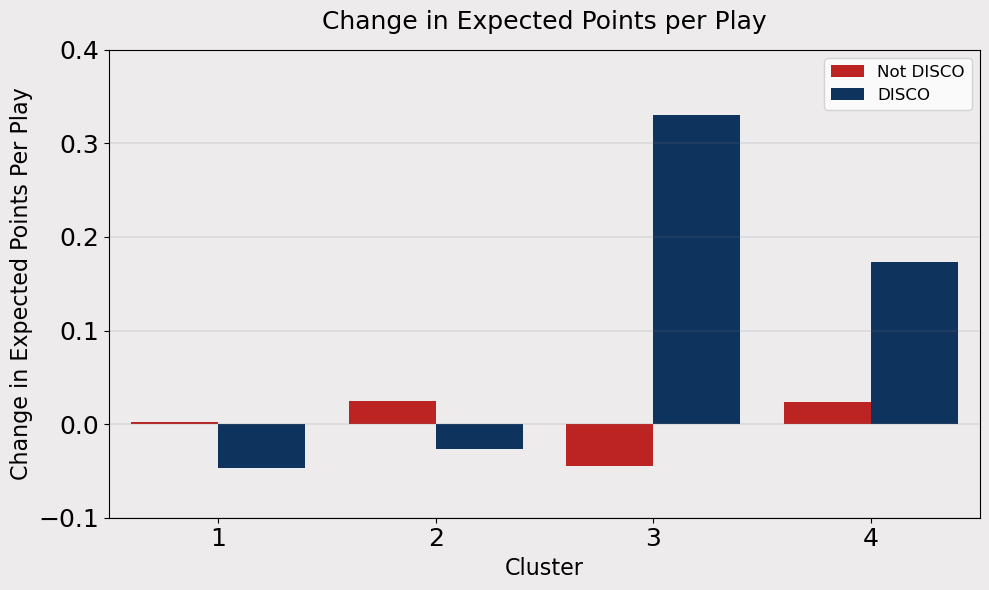

In [68]:

df_performance = pd.read_csv('../assets/data/NFL Data Bowl 2025/df_performance.csv')

# Set colors for the bars
colors = ['#D50A0A', '#013369']  # NFL logo red and blue

# Create the bar plot and assign it to ax
plt.figure(figsize=(10, 6))
ax = sn.barplot(
    data=df_performance,
    x='coverage_cluster_cat',
    y='expectedPointsAdded',
    hue='disco',
    palette=colors
)

# Customize the plot
plt.title('Change in Expected Points per Play', fontsize=18, color='black', pad=15)
plt.xlabel('Cluster', fontsize=16, color='black')
plt.ylabel('Change in Expected Points Per Play', fontsize=16, color='black')

# Ensure x-axis shows integers
plt.xticks(fontsize=18, color='black')

# Set y-axis range
plt.ylim(-0.1, 0.4)
plt.yticks(fontsize=18, color='black')

# Adjust legend
plt.legend(title=None, fontsize=12, loc='best')

# Remove gridlines
plt.grid(False)

# Ensure layout fits
plt.tight_layout()
# Enable horizontal gridlines for y-axis ticks
ax.yaxis.grid(True, which='major', linestyle='-', linewidth=0.2, color='grey')
ax.grid(axis='x', visible=False)  # Disable vertical gridlines

# Set background colors to very light grey
ax.set_facecolor('#edebeb')  # Light grey for the plot area
plt.gcf().set_facecolor('#edebeb')  # Light grey for the figure background


# Show the plot
plt.show()

# Conclusion, Limitations, and Future Enhancements

The DISCO metric is not an evaluation of defensive strategy, rather an analysis of defensive strategy.  Being unpredictable sometimes means playing the hand right in front of your opponent’s eyes. Factors such as game situation or player personnel could trump the desire to disguise in certain situations.  One intention for use of DISCO would be as a supplement to scouting, film, and pre-snap offensive decision making.   Another is for common NFL fans to leverage as they watch games, as it can be fun to predict what teams will do on each play.  

For future enhancements to DISCO:
- Incorporating the *potentially relevant metrics not included*, noted above
- Factoring in recent play history, game situation, and team's history would add more context into team's alignment decisions
- Leveraging a supervised machine learning algorithm that incorporates predictive behaviors
- Using more than 4 clusters may be relevant for some teams and lead to more precise results
- Incorporating less common pass coverages or more specific coverages
- Looking into blitz disguises (and fake blitzes)

# Acknowledgments

Thank you to the NFL analytics community and the hosts of the Big Data Bowl competition for engaging with fans and data enthusiasts in such a cool way!  Also, thank you to the data engineers and architects who developed Next Gen Stats and other NFL data, providing easily accessible and usable data to the public.  


# Appendix
All code is available in this [github repo](https://github.com/drewmalter12/nfl_big_data_bowl25).